In [3]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

# Кластеризация - кейс


https://www.kaggle.com/carrie1/ecommerce-data

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

In [4]:
df = pd.read_csv('data1.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
# Дубликаты
df.duplicated().sum()

5268

In [8]:
df.drop_duplicates(inplace=True)

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.  
**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description**: Product (item) name. Nominal.  
**Quantity**: The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.   
**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.  
**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country**: Country name. Nominal, the name of the country where each customer resides.  



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


<AxesSubplot:>

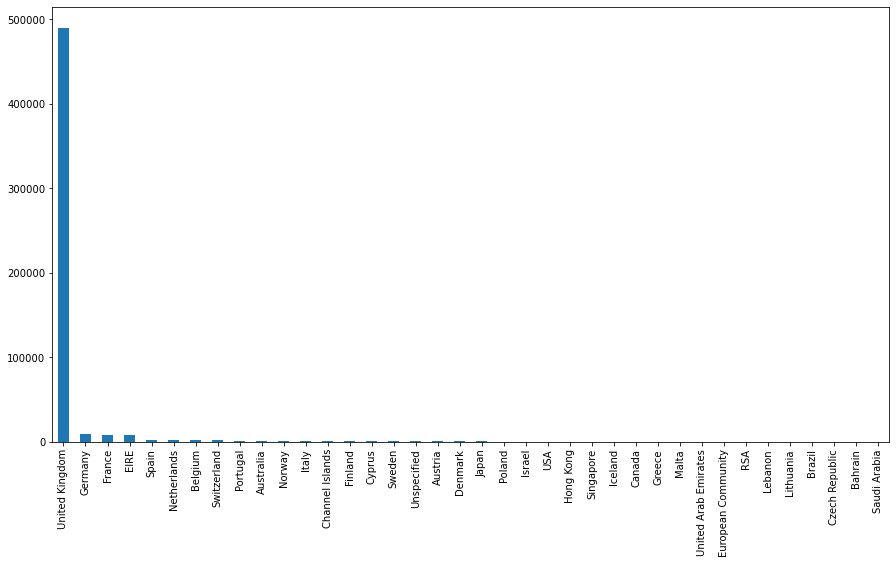

In [10]:
df.Country.value_counts().plot.bar()

In [11]:
df.CustomerID.unique().shape

(4373,)

In [12]:
df.StockCode.unique().shape

(4070,)

array([[<AxesSubplot:title={'center':'InvoiceNo'}>]], dtype=object)

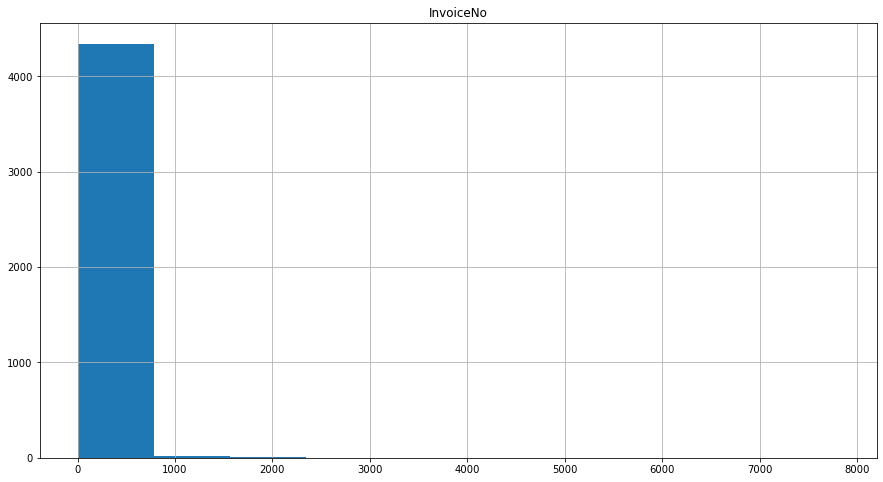

In [15]:
# Сколько заказов сделали пользователи?
counts_df = df[['CustomerID', 'InvoiceNo']].groupby('CustomerID').agg('count').sort_values(by=['InvoiceNo'], ascending=False)
counts_df.hist()

In [47]:
counts_df['InvoiceNo'].describe()

count   4372.00
mean      91.86
std      229.22
min        1.00
25%       17.00
50%       41.00
75%       99.25
max     7812.00
Name: InvoiceNo, dtype: float64

In [17]:
df[df['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.00,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.00,United Kingdom


In [16]:
counts_df.describe()

,InvoiceNo
count,4372.00
mean,91.86
std,229.22
min,1.00
25%,17.00
50%,41.00
75%,99.25
max,7812.00


In [19]:
np.where(counts == 1)[0].shape

(79,)

In [20]:
del counts
del counts_df

# Продукты

In [10]:
import re

letters = re.compile(r'[^A-Z ]+')
spaces = re.compile('  +')

def tokenize(row):
    row = letters.sub('', row)
    row = spaces.sub(' ', row)
    return row

print(tokenize('PAPER CRAFT , LITTLE BIRDIE'))
print(tokenize('????damages????'))
print(tokenize('CREAM HANGING HEART T-LIGHT       HOLDER'))

PAPER CRAFT LITTLE BIRDIE

CREAM HANGING HEART TLIGHT HOLDER


In [11]:
df['DescriptionCleaned'] = df['Description'].replace(np.nan, '').apply(tokenize)

In [21]:
len(df['DescriptionCleaned'].unique())

3999

# bag of words
1 - bag of bag of words  
2 - bag cupid of coat  

  bag coat cupid of words  
1  2   0     0   2   1  
2  1   1     1   1   0  


In [62]:
descs_unique.head()

,DescriptionCleaned
0,WHITE HANGING HEART TLIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART


In [13]:
from collections import Counter
docs = []
word_count = Counter()

descs_unique = pd.DataFrame(df['DescriptionCleaned'].unique(), columns=['DescriptionCleaned'])
for idx, row in descs_unique.iterrows():
    desc = row['DescriptionCleaned']
    tokens = filter(None, desc.split(' '))
    docs.append(Counter(tokens))
    for t in docs[-1].keys():
        word_count[t] += 1
        #print(t)

In [19]:
docs[:5]

[Counter({'WHITE': 1, 'HANGING': 1, 'HEART': 1, 'TLIGHT': 1, 'HOLDER': 1}),
 Counter({'WHITE': 1, 'METAL': 1, 'LANTERN': 1}),
 Counter({'CREAM': 1, 'CUPID': 1, 'HEARTS': 1, 'COAT': 1, 'HANGER': 1}),
 Counter({'KNITTED': 1,
          'UNION': 1,
          'FLAG': 1,
          'HOT': 1,
          'WATER': 1,
          'BOTTLE': 1}),
 Counter({'RED': 1, 'WOOLLY': 1, 'HOTTIE': 1, 'WHITE': 1, 'HEART': 1})]

In [21]:
docs_filtered[:5]

[{'WHITE': 1, 'HANGING': 1, 'HEART': 1, 'TLIGHT': 1, 'HOLDER': 1},
 {'WHITE': 1, 'METAL': 1, 'LANTERN': 1},
 {'CREAM': 1, 'HEARTS': 1, 'HANGER': 1},
 {'UNION': 1, 'HOT': 1, 'WATER': 1, 'BOTTLE': 1},
 {'RED': 1, 'WHITE': 1, 'HEART': 1}]

In [14]:
word_count

Counter({'WHITE': 132,
         'HANGING': 104,
         'HEART': 238,
         'TLIGHT': 89,
         'HOLDER': 117,
         'METAL': 101,
         'LANTERN': 20,
         'CREAM': 51,
         'CUPID': 3,
         'HEARTS': 31,
         'COAT': 8,
         'HANGER': 19,
         'KNITTED': 8,
         'UNION': 28,
         'FLAG': 10,
         'HOT': 29,
         'WATER': 28,
         'BOTTLE': 41,
         'RED': 198,
         'WOOLLY': 2,
         'HOTTIE': 1,
         'SET': 377,
         'BABUSHKA': 23,
         'NESTING': 3,
         'BOXES': 19,
         'GLASS': 156,
         'STAR': 55,
         'FROSTED': 2,
         'HAND': 20,
         'WARMER': 19,
         'JACK': 21,
         'POLKA': 3,
         'DOT': 2,
         'ASSORTED': 59,
         'COLOUR': 33,
         'BIRD': 45,
         'ORNAMENT': 1,
         'POPPYS': 4,
         'PLAYHOUSE': 4,
         'BEDROOM': 1,
         'KITCHEN': 26,
         'FELTCRAFT': 24,
         'PRINCESS': 3,
         'CHARLOTTE': 11,
    

In [16]:
words_most = dict(word_count.most_common(300))
words_most

{'SET': 377,
 'PINK': 297,
 'OF': 241,
 'HEART': 238,
 'VINTAGE': 210,
 'BLUE': 205,
 'RED': 198,
 'BAG': 168,
 'GLASS': 156,
 'CHRISTMAS': 153,
 'BOX': 136,
 'WHITE': 132,
 'DESIGN': 127,
 'HOLDER': 117,
 'SMALL': 115,
 'FLOWER': 115,
 'LARGE': 105,
 'HANGING': 104,
 'GREEN': 102,
 'METAL': 101,
 'DECORATION': 100,
 'NECKLACE': 100,
 'ROSE': 99,
 'BLACK': 97,
 'RETROSPOT': 96,
 'WALL': 95,
 'CANDLE': 92,
 'TLIGHT': 89,
 'CARD': 86,
 'SILVER': 86,
 'PAPER': 82,
 'CAKE': 82,
 'WITH': 81,
 'AND': 80,
 'ART': 75,
 'PACK': 72,
 'IN': 71,
 'MUG': 70,
 'POLKADOT': 70,
 'EARRINGS': 69,
 'COVER': 68,
 'BRACELET': 68,
 'IVORY': 66,
 'WRAP': 66,
 'GARDEN': 63,
 'MINI': 61,
 'ASSORTED': 59,
 'EGG': 57,
 'LOVE': 56,
 'TREE': 56,
 'STAR': 55,
 'GIFT': 55,
 'SIGN': 55,
 'TEA': 54,
 'BOWL': 53,
 'CUSHION': 52,
 'CARDS': 52,
 'CREAM': 51,
 'FRAME': 50,
 'MIRROR': 50,
 'CRYSTAL': 50,
 'W': 49,
 'ZINC': 48,
 'EASTER': 48,
 'WOODEN': 47,
 'RING': 47,
 'BIRD': 45,
 'CERAMIC': 45,
 'CLOCK': 44,
 'TIN': 44,

In [17]:
docs_filtered = [{k: v for k, v in d.items() if k in words_most} for d in docs]

In [18]:
docs_filtered

[{'WHITE': 1, 'HANGING': 1, 'HEART': 1, 'TLIGHT': 1, 'HOLDER': 1},
 {'WHITE': 1, 'METAL': 1, 'LANTERN': 1},
 {'CREAM': 1, 'HEARTS': 1, 'HANGER': 1},
 {'UNION': 1, 'HOT': 1, 'WATER': 1, 'BOTTLE': 1},
 {'RED': 1, 'WHITE': 1, 'HEART': 1},
 {'SET': 1, 'BABUSHKA': 1, 'BOXES': 1},
 {'GLASS': 1, 'STAR': 1, 'TLIGHT': 1, 'HOLDER': 1},
 {'HAND': 1, 'WARMER': 1, 'UNION': 1, 'JACK': 1},
 {'HAND': 1, 'WARMER': 1, 'RED': 1},
 {'ASSORTED': 1, 'COLOUR': 1, 'BIRD': 1},
 {},
 {'KITCHEN': 1},
 {'FELTCRAFT': 1, 'CHARLOTTE': 1, 'DOLL': 1},
 {'IVORY': 1, 'MUG': 1, 'COSY': 1},
 {'BOX': 1, 'OF': 1, 'ASSORTED': 1, 'COLOUR': 1},
 {'BOX': 1, 'OF': 1, 'VINTAGE': 1, 'JIGSAW': 1},
 {'BOX': 1, 'OF': 1, 'VINTAGE': 1, 'ALPHABET': 1},
 {'HOME': 1},
 {'LOVE': 1},
 {'BOX': 1, 'WITH': 1, 'METAL': 1, 'HEART': 1},
 {'DOORMAT': 1, 'NEW': 1},
 {'JAM': 1, 'SET': 1, 'WITH': 1},
 {'RED': 1, 'RACK': 1},
 {'YELLOW': 1, 'RACK': 1},
 {'BLUE': 1, 'RACK': 1},
 {},
 {'CLOCK': 1, 'PINK': 1},
 {'CLOCK': 1, 'RED': 1},
 {'CLOCK': 1, 'GREEN

In [22]:
from sklearn.feature_extraction import DictVectorizer

v = DictVectorizer(sparse=False)
X = v.fit_transform(docs_filtered)

In [25]:
X.shape

(3999, 300)

In [26]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
np.count_nonzero(X)

11560

In [ ]:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [66]:

inertias = []
silhs = []
for n_clusters in range(3, 13):
    
    print(n_clusters)
    
    kmeans = KMeans(n_clusters=n_clusters, n_init=30)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    
    print("For n_clusters =", n_clusters, "The inertia_ is :", kmeans.inertia_, "The average silhouette_score is :", silhouette_avg)
    
    inertias.append(kmeans.inertia_)
    silhs.append(silhouette_avg)
    


3
For n_clusters = 3 The inertia_ is : 10802.086989286405 The average silhouette_score is : 0.0745324853582345
4
For n_clusters = 4 The inertia_ is : 10580.458175560545 The average silhouette_score is : 0.07564449852244395
5
For n_clusters = 5 The inertia_ is : 10520.2361680762 The average silhouette_score is : 0.06490730334670547
6
For n_clusters = 6 The inertia_ is : 10362.512615180733 The average silhouette_score is : 0.05564248267854278
7
For n_clusters = 7 The inertia_ is : 10187.343368478589 The average silhouette_score is : 0.0808905308268331
8
For n_clusters = 8 The inertia_ is : 10076.17317765659 The average silhouette_score is : 0.0766963233799637
9
For n_clusters = 9 The inertia_ is : 9798.427813037337 The average silhouette_score is : 0.0782621149604727
10
For n_clusters = 10 The inertia_ is : 9789.551301318048 The average silhouette_score is : 0.047840315415735746
11
For n_clusters = 11 The inertia_ is : 9623.345202629842 The average silhouette_score is : 0.085848545578354

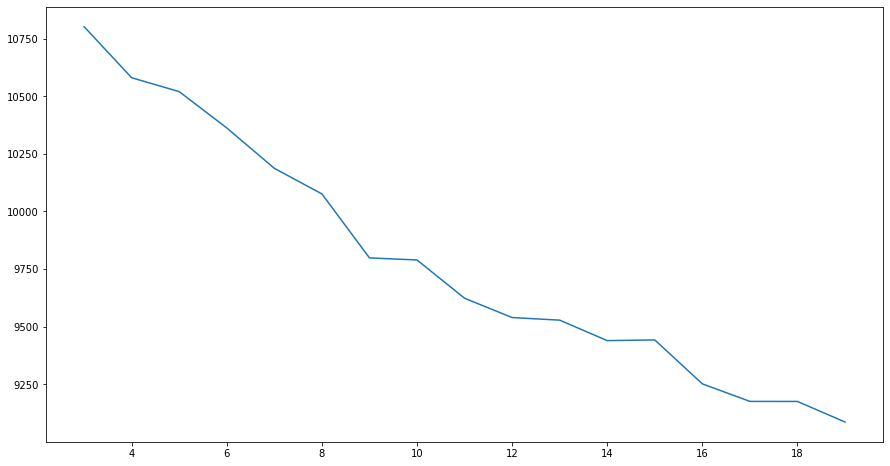

In [68]:
plt.plot(range(3, 20), inertias)

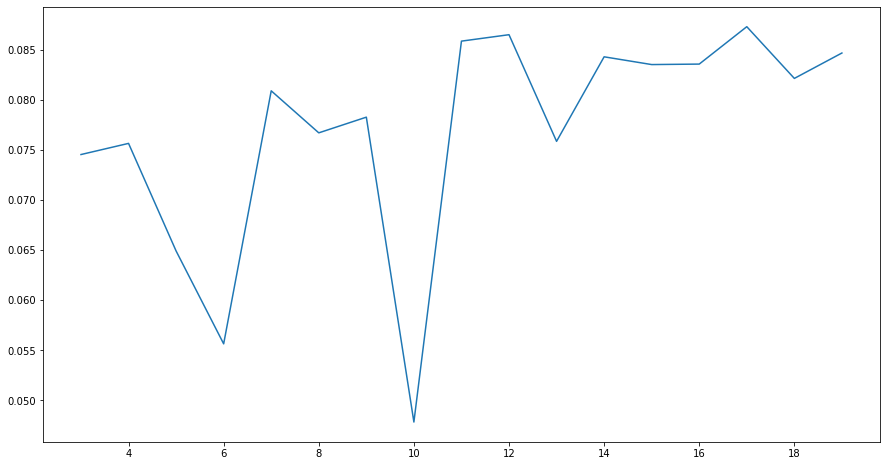

In [69]:
plt.plot(range(3, 20), silhs)

In [72]:
def clusters_stats(n_clusters, clusters, print_words=True):
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(X, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusters)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusters == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    print(np.bincount(clusters))
    if print_words:
        cluster_words_count = defaultdict(Counter)

        for c, doc in zip(clusters, docs_filtered):
            for w in doc.keys():
                cluster_words_count[c][w] += 1

        for c in cluster_words_count:
            print('Cluster {}'.format(c))
            print(', '.join('{}: {}'.format(w, count) for w, count in cluster_words_count[c].most_common(10)))
            print()

For n_clusters = 5 The average silhouette_score is : 0.07526802156203974


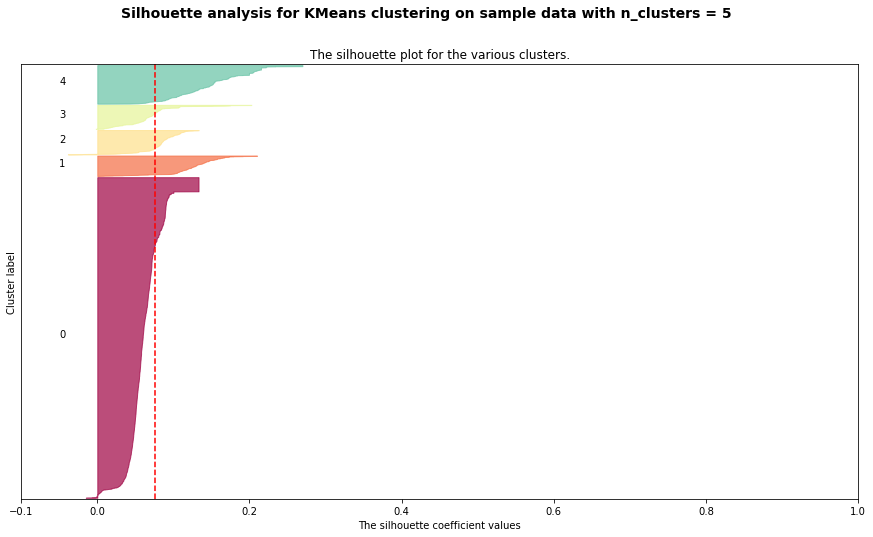

[2993  192  228  225  361]
Cluster 2
HEART: 228, DECORATION: 27, HANGING: 26, PINK: 25, HOLDER: 21, SMALL: 20, LOVE: 20, LARGE: 19, WHITE: 17, TLIGHT: 17

Cluster 0
PINK: 237, BLUE: 178, RED: 150, BAG: 119, BOX: 113, DESIGN: 108, CHRISTMAS: 106, WHITE: 101, FLOWER: 96, METAL: 91

Cluster 4
SET: 361, OF: 144, CARDS: 37, PAPER: 27, TINS: 19, TLIGHTS: 18, CUTLERY: 17, CANDLES: 17, VINTAGE: 17, CHRISTMAS: 15

Cluster 3
GLASS: 142, HOLDER: 96, TLIGHT: 61, JAR: 22, SMALL: 18, CANDLE: 17, HANGING: 14, SILVER: 14, CHARM: 14, PINK: 14

Cluster 1
VINTAGE: 192, BAG: 30, CHRISTMAS: 19, RED: 17, DOILY: 14, PAISLEY: 13, TIN: 13, PINK: 12, LEAF: 12, BEAD: 10



In [73]:
n_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters=n_clusters)
kmeans.fit(X)
clusters = kmeans.predict(X)
kmeans.inertia_
clusters_stats(n_clusters, clusters)

For n_clusters = 6 The average silhouette_score is : 0.06635227762379513


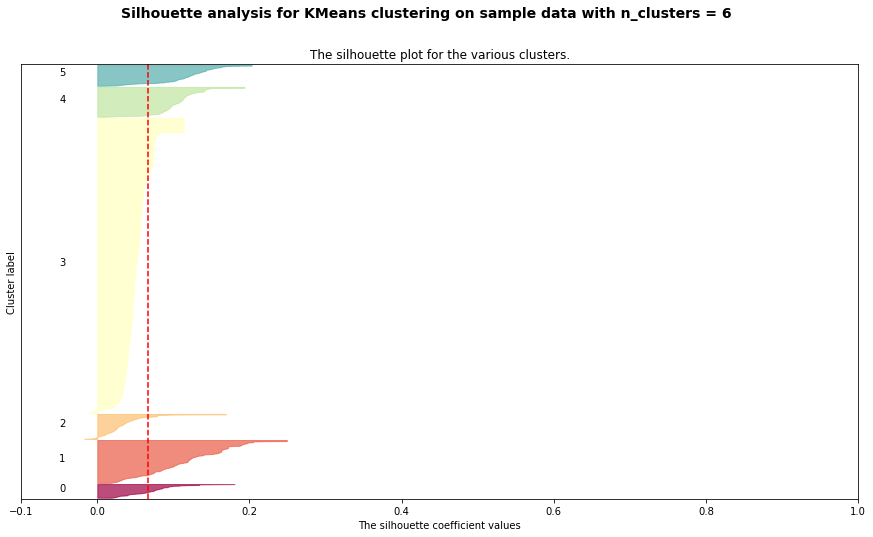

[ 129  402  234 2760  280  194]
Cluster 3
HEART: 186, BLUE: 170, RED: 155, GLASS: 120, CHRISTMAS: 106, HOLDER: 105, WHITE: 102, METAL: 99, BOX: 99, BAG: 99

Cluster 1
SET: 360, OF: 186, PACK: 42, CARDS: 38, PAPER: 29, TINS: 19, CAKE: 17, TLIGHTS: 17, CHRISTMAS: 17, CUTLERY: 16

Cluster 2
DESIGN: 109, FLOWER: 91, MUG: 58, BAG: 18, BLUE: 18, BOX: 14, COFFEE: 10, WITH: 10, ENAMEL: 9, WHITE: 9

Cluster 5
VINTAGE: 194, BAG: 30, CHRISTMAS: 19, RED: 17, DOILY: 14, PAISLEY: 13, TIN: 13, PINK: 12, LEAF: 12, SET: 10

Cluster 4
PINK: 280, HEART: 25, POLKADOT: 21, FLOWER: 15, BAG: 12, COVER: 12, FLOCK: 12, GLASS: 12, AND: 10, BUTTERFLY: 10

Cluster 0
BLACK: 87, FRAME: 45, PHOTO: 21, NECKLACE: 12, WHITE: 11, EARRINGS: 10, GLASS: 10, BRACELET: 9, BAROQUE: 8, HEART: 7



In [74]:
n_clusters = 6
kmeans = KMeans(init='k-means++', n_clusters=n_clusters)
kmeans.fit(X)
clusters = kmeans.predict(X)
kmeans.inertia_
clusters_stats(n_clusters, clusters)

In [75]:
descs_unique.shape, clusters.shape

((3999, 1), (3999,))

In [76]:
descs_unique['cluster'] = clusters

In [77]:
descs_unique.head()

,DescriptionCleaned,cluster
0,WHITE HANGING HEART TLIGHT HOLDER,3
1,WHITE METAL LANTERN,3
2,CREAM CUPID HEARTS COAT HANGER,3
3,KNITTED UNION FLAG HOT WATER BOTTLE,3
4,RED WOOLLY HOTTIE WHITE HEART,3


In [78]:
df = pd.merge(df, descs_unique, on='DescriptionCleaned', how='left')

In [79]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionCleaned,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,WHITE HANGING HEART TLIGHT HOLDER,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,WHITE METAL LANTERN,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,CREAM CUPID HEARTS COAT HANGER,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,RED WOOLLY HOTTIE WHITE HEART,3


In [82]:
df_clusters = df.cluster
total_price = df.UnitPrice * df.Quantity

In [83]:
def get_cluster_total_spent(x, i):
    if x.cluster != i:
        return 0
    
    return x.UnitPrice * x.Quantity

for i in range(n_clusters):
    clusters_i = np.zeros(df_clusters.shape[0])
    clusters_i[df_clusters == i] = total_price[df_clusters == i]
    df['cluster_{}'.format(i)] = clusters_i

In [84]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DescriptionCleaned,cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,WHITE HANGING HEART TLIGHT HOLDER,3,0.00,0.00,0.00,15.30,0.00,0.00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,WHITE METAL LANTERN,3,0.00,0.00,0.00,20.34,0.00,0.00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,CREAM CUPID HEARTS COAT HANGER,3,0.00,0.00,0.00,22.00,0.00,0.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,3,0.00,0.00,0.00,20.34,0.00,0.00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,RED WOOLLY HOTTIE WHITE HEART,3,0.00,0.00,0.00,20.34,0.00,0.00


In [85]:
group = df[['CustomerID', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']].groupby('CustomerID').agg('sum')
group.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
CustomerID,,,,,,
12346.00,0.00,0.00,0.00,0.00,0.00,0.00
12347.00,141.30,292.05,13.50,3050.55,278.00,534.60
12348.00,0.00,484.28,81.36,1104.40,63.60,63.60
12349.00,0.00,310.32,115.26,1192.98,37.50,101.49
12350.00,0.00,0.00,0.00,314.60,0.00,19.80


In [86]:
customers = group[(group.cluster_0 != 0) | (group.cluster_1 != 0) | (group.cluster_2 != 0)]
customers.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
CustomerID,,,,,,
12347.00,141.30,292.05,13.50,3050.55,278.00,534.60
12348.00,0.00,484.28,81.36,1104.40,63.60,63.60
12349.00,0.00,310.32,115.26,1192.98,37.50,101.49
12352.00,0.00,257.60,37.88,1053.58,142.85,53.50
12354.00,0.00,133.75,17.00,725.82,176.48,26.35


In [88]:
X = customers

In [89]:
X.shape

(3897, 6)

In [90]:
list(X.sum(axis=0))

[310195.19999999984,
 1033448.9099999974,
 434098.64,
 5430358.102999996,
 324017.8100000006,
 513390.2300000017]

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
print('variables mean values: ', scaler.mean_)
scaled_matrix = scaler.transform(X)

variables mean values:  [  79.59846035  265.19089299  111.39303054 1393.47141468   83.14544778
  131.73985887]
